## 3. Data Analysis

### 3.1 Data Discovery

In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

pd.options.display.max_columns = 200
pd.options.mode.chained_assignment = None

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from string import punctuation

from collections import Counter
import re
import numpy as np

from tqdm import tqdm_notebook
tqdm_notebook().pandas()

In [13]:
data = pd.read_csv('news.csv')
print(data.shape)

(50126, 9)


In [14]:
data.head(3)

author  \
0      http://www.abc.net.au/news/lisa-millar/166890   
1  http://www.abc.net.au/news/emily-sakzewski/768...   
2  http://www.abc.net.au/news/jackson-vernon/7531870   

                                         description           publishedAt  \
0  In the month following Donald Trump's inaugura...  2017-02-26T08:08:20Z   
1  A fasting diet could reverse diabetes and repa...  2017-02-26T04:39:24Z   
2  Researchers discover what could be one of the ...  2017-02-26T02:02:28Z   

        source                                              title  \
0  abc-news-au  Has Russia changed its tone towards Donald Trump?   
1  abc-news-au  Fasting diet 'could reverse diabetes and regen...   
2  abc-news-au  Mine pollution turning Blue Mountains river in...   

                                                 url  \
0  http://www.abc.net.au/news/2017-02-26/donald-t...   
1  http://www.abc.net.au/news/2017-02-26/fasting-...   
2  http://www.abc.net.au/news/2017-02-26/blue-mou...   

                                          urlToImage category  \
0  http://www.abc.net.au/news/image/8300726-1x1-7...  general   
1  http://www.abc.net.au/news/image/8304732-1x1-7...  general   
2  http://www.abc.net.au/news/image/8304524-1x1-7...  general   

                scraping_date  
0  2017-02-26 13:08:22.317772  
1  2017-02-26 13:08:22.317772  
2  2017-02-26 13:08:22.317772

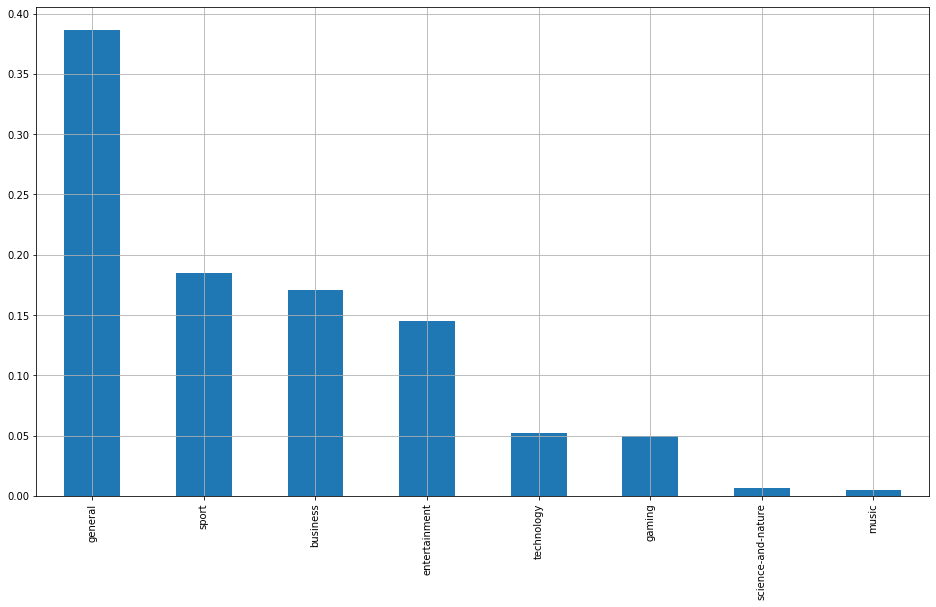

In [15]:
data.category.value_counts(normalize=True).plot(kind='bar', grid=True, figsize=(16, 9))
plt.show()

In [16]:
data = data.drop_duplicates('description')

In [17]:
data = data[~data['description'].isnull()]

print(data.shape)

(44773, 9)


In [18]:
data = data[(data.description.map(len) > 140) & (data.description.map(len) <= 300)]
data.reset_index(inplace=True, drop=True)

print(data.shape)

(13259, 9)


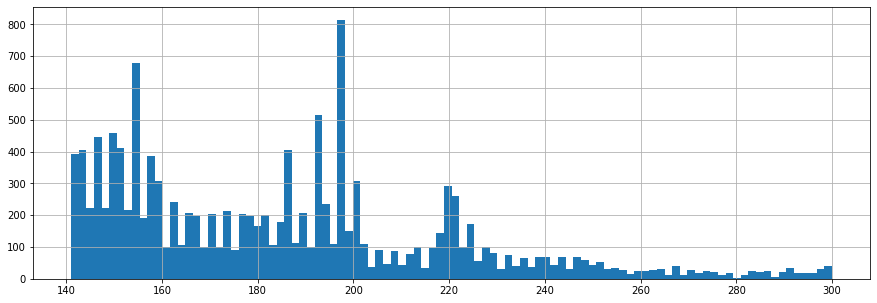

In [19]:
data.description.map(len).hist(figsize=(15, 5), bins=100)
plt.show()

In [20]:
data = data.sample(10000, random_state=42)
data.reset_index(inplace=True, drop=True)

data.head(2)

author  \
0                                       Craig Torres   
1  By Richard Spillett, Crime Correspondent For M...   

                                         description  \
0  Demographic trends are already slowing immigra...   
1  Six jails are offering child abusers drugs to ...   

                publishedAt      source  \
0  2017-03-23T04:01:00.004Z   bloomberg   
1      2017-03-01T12:12:12Z  daily-mail   

                                               title  \
0  No Need for a Wall: Latin Demographics to Shri...   
1  Jailed paedophiles could be 'chemically castra...   

                                                 url  \
0  https://www.bloomberg.com/politics/articles/20...   
1  http://www.dailymail.co.uk/news/article-427050...   

                                          urlToImage       category  \
0  https://assets.bwbx.io/s3/javelin/public/javel...       business   
1  http://i.dailymail.co.uk/i/pix/2017/03/01/08/0...  entertainment   

                scraping_date  
0  2017-03-23 06:05:26.107702  
1  2017-03-01 13:20:26.079158

### 3.2 Tokenization

In [21]:
stop_words = []

f = open('stopwords.txt', 'r')
for l in f.readlines():
    stop_words.append(l.replace('\n', ''))
    
additional_stop_words = ['t', 'will']
stop_words += additional_stop_words

print(len(stop_words))

668


In [22]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [23]:
def tokenizer(text):
    text = clean_text(text)    
    tokens = [word_tokenize(sent) for sent in sent_tokenize(text)]
    tokens = list(reduce(lambda x,y: x+y, tokens))
    tokens = list(filter(lambda token: token not in (stop_words + list(punctuation)) , tokens))
    return tokens

In [24]:
data['description'].dtype

dtype('O')

In [25]:
data['description'] = data['description'].map(lambda d: str(d))
data['tokens'] = data['description'].progress_map(lambda d: tokenizer(d))

In [26]:
for descripition, tokens in zip(data['description'].head(5), data['tokens'].head(5)):
    print('description:', descripition)
    print('tokens:', tokens)
    print()

description: Demographic trends are already slowing immigration to the U.S. from Latin America, making the current administration’s desire for a border wall look “anachronistic,” according to new research by University of California, San Diego, economists.
tokens: ['demographic', 'trends', 'slowing', 'immigration', 'latin', 'america', 'making', 'current', 'administration', 'desire', 'border', 'wall', 'anachronistic', 'university', 'california', 'san', 'diego', 'economists']

description: Six jails are offering child abusers drugs to reduce sexual interest and obsessive behaviour while they serve their sentences after it was trialled at HMP Whatton in Nottinghamshire.
tokens: ['jails', 'offering', 'child', 'abusers', 'drugs', 'reduce', 'sexual', 'interest', 'obsessive', 'behaviour', 'serve', 'sentences', 'trialled', 'hmp', 'whatton', 'nottinghamshire']

description: Washington Huskies wide receiver John Ross officially broke Chris Johnson's long-standing 40-yard-dash record Saturday   a

In [27]:
def keywords(category):
    tokens = data[data['category'] == category]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(10)

In [28]:
for category in set(data['category']):
    print('category :', category)
    print('top 10 keywords:', keywords(category))
    print('---')

category : general
top 10 keywords: [('trump', 1135), ('president', 992), ('donald', 586), ('house', 434), ('state', 339), ('year', 291), ('government', 276), ('people', 274), ('minister', 263), ('tuesday', 253)]
---
category : music
top 10 keywords: [('geordie', 3), ('shore', 3), ('facial', 2), ('best', 2), ('star', 2), ('reports', 2), ('bear', 2), ('charlotte', 2), ('crosby', 2), ('babe', 2)]
---
category : business
top 10 keywords: [('trump', 375), ('president', 278), ('donald', 214), ('house', 129), ('year', 104), ('people', 81), ('state', 69), ('administration', 68), ('white', 67), ('care', 66)]
---
category : gaming
top 10 keywords: [('ign', 5), ('playing', 5), ('gaming', 3), ('hd', 3), ('well', 2), ('deals', 2), ('justice', 2), ('league', 2), ('feature', 2), ('breath', 2)]
---
category : entertainment
top 10 keywords: [('year', 145), ('people', 127), ('time', 106), ('week', 98), ('pictured', 92), ('season', 88), ('night', 88), ('appeared', 85), ('series', 85), ('episode', 84)]
-

### 3.3 Vectorization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz = vectorizer.fit_transform(list(data['tokens'].map(lambda tokens: ' '.join(tokens))))

vz.shape

(10000, 7204)

In [30]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

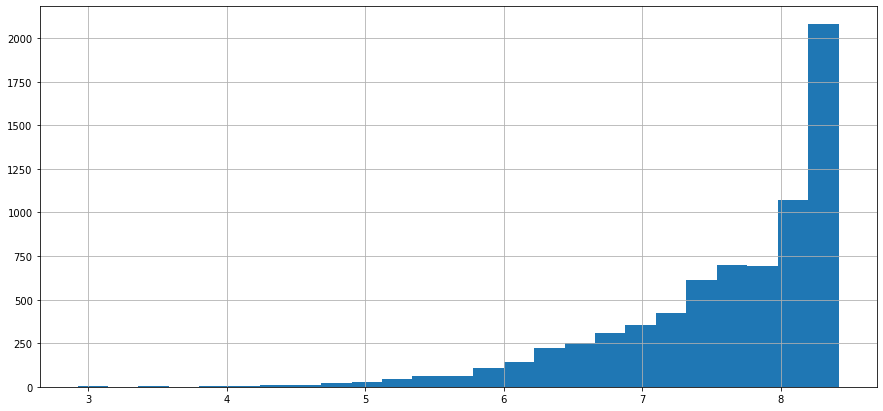

In [31]:
tfidf.tfidf.hist(bins=25, figsize=(15,7))
plt.show()

In [33]:
from wordcloud import WordCloud

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

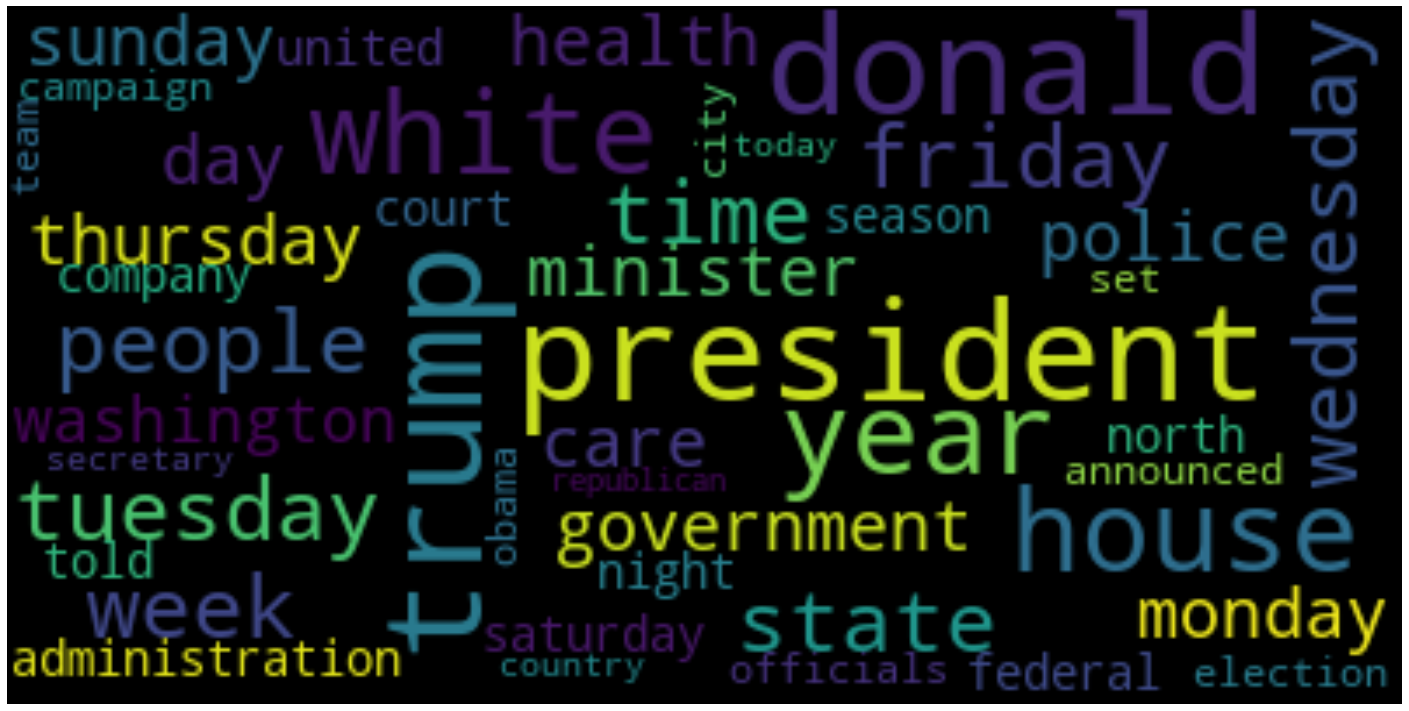

In [34]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(50))
plt.show()

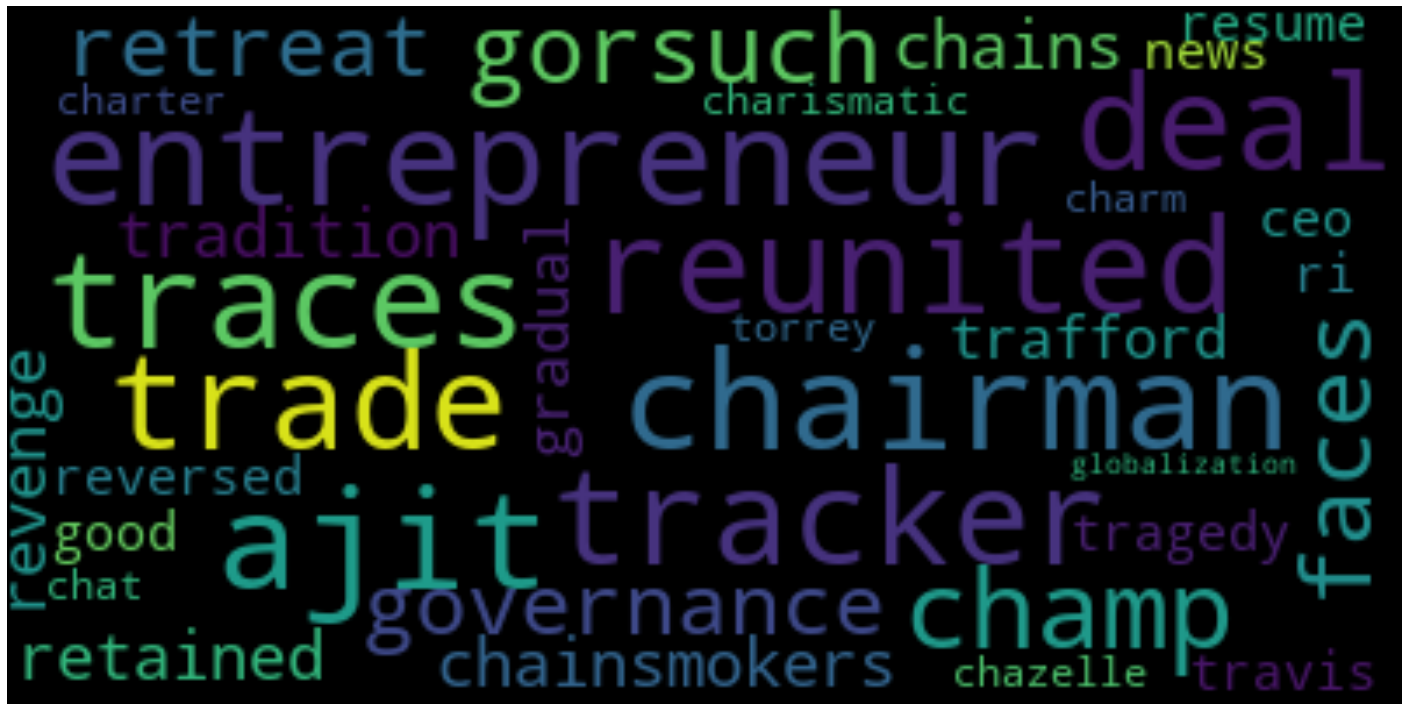

In [35]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(30))
plt.show()

In [36]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(vz)

svd_tfidf.shape

(10000, 50)

In [37]:
run = True
if run:
# run this (takes times)
    from sklearn.manifold import TSNE
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
    tsne_tfidf = tsne_model.fit_transform(svd_tfidf)
    print(tsne_tfidf.shape)
    tsne_tfidf_df = pd.DataFrame(tsne_tfidf)
    tsne_tfidf_df.columns = ['x', 'y']
    tsne_tfidf_df['category'] = data['category']
    tsne_tfidf_df['description'] = data['description']
    tsne_tfidf_df.to_csv('tsne_tfidf.csv', encoding='utf-8', index=False)
else:
# or import the dataset directly
    tsne_tfidf_df = pd.read_csv('tsne_tfidf.csv')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.093s...
[t-SNE] Computed neighbors for 10000 samples in 22.573s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.044997
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.812126
[t-SNE] KL divergence after 500 iterations: 1.731140
(10000, 2)


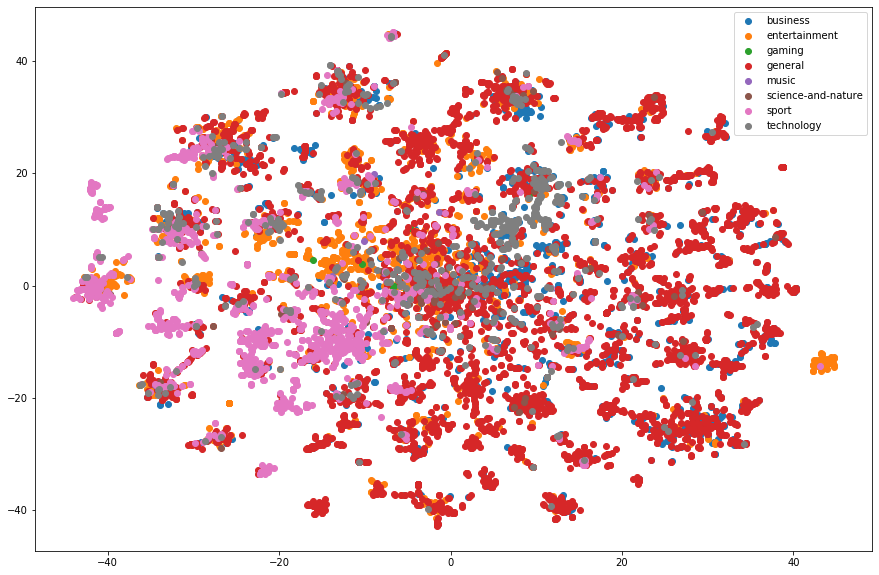

In [38]:
groups = tsne_tfidf_df.groupby('category')
fig, ax = plt.subplots(figsize=(15, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=name)
ax.legend()
plt.show()

In [39]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file

In [40]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="tf-idf clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

palette = d3['Category10'][len(tsne_tfidf_df['category'].unique())]
color_map = bmo.CategoricalColorMapper(factors=tsne_tfidf_df['category'].map(str).unique(), palette=palette)

plot_tfidf.scatter(x='x', y='y', color={'field': 'category', 'transform': color_map}, 
                   legend='category', source=tsne_tfidf_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "category":"@category"}

show(plot_tfidf)

Loading BokehJS ...

## 4. Clustering

In [41]:
vz.shape

(10000, 7204)

In [42]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [43]:
distorsions = []
sil_scores = []
k_max = 80
for k in tqdm_notebook(range(2, k_max)):
    kmeans_model = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=1, random_state=42,  
                         init_size=1000, verbose=False, max_iter=1000)
    kmeans_model.fit(vz)
    sil_score = silhouette_score(vz, kmeans_model.labels_)
    sil_scores.append(sil_score)
    distorsions.append(kmeans_model.inertia_)

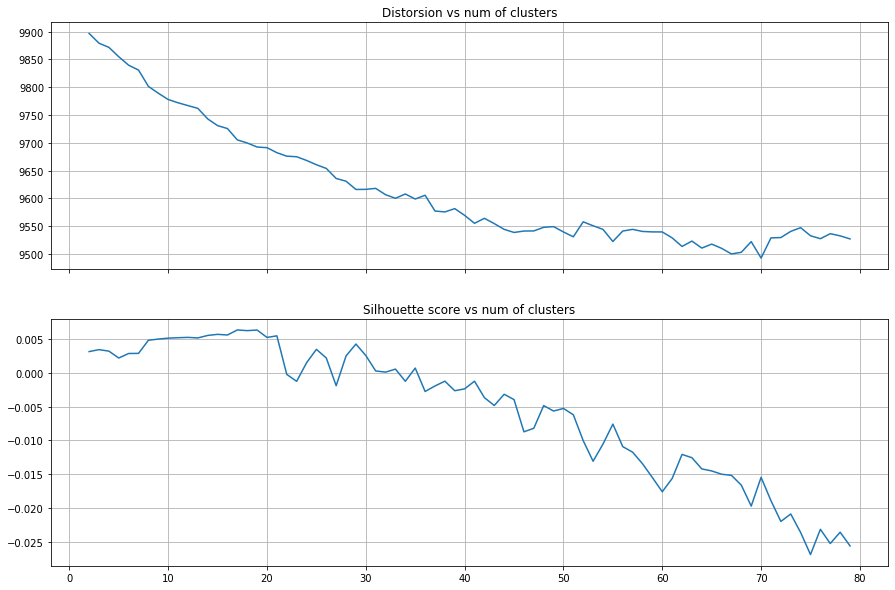

In [44]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

ax1.plot(range(2, k_max), distorsions)
ax1.set_title('Distorsion vs num of clusters')
ax1.grid(True)

ax2.plot(range(2, k_max), sil_scores)
ax2.set_title('Silhouette score vs num of clusters')
ax2.grid(True)

In [45]:
num_clusters = 40
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42,                       
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000, )
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

In [46]:
for (i, desc),category in zip(enumerate(data.description),data['category']):
    if(i < 5):
        print("Cluster " + str(kmeans_clusters[i]) + ": " + desc + 
              "(distance: " + str(kmeans_distances[i][kmeans_clusters[i]]) + ")")
        print('category: ',category)
        print('---')

Cluster 36: Demographic trends are already slowing immigration to the U.S. from Latin America, making the current administration’s desire for a border wall look “anachronistic,” according to new research by University of California, San Diego, economists.(distance: 0.9976979995173878)
category:  business
---
Cluster 36: Six jails are offering child abusers drugs to reduce sexual interest and obsessive behaviour while they serve their sentences after it was trialled at HMP Whatton in Nottinghamshire.(distance: 0.9996188106167122)
category:  entertainment
---
Cluster 36: Washington Huskies wide receiver John Ross officially broke Chris Johnson's long-standing 40-yard-dash record Saturday   at the NFL Scouting Combine in Indianapolis with a speedy sprint that took all of 4...(distance: 0.9973626551182955)
category:  general
---
Cluster 36: Is the new, Lego-ized version of The Belko Experiment trailer less disturbing than it’s flesh-and-blood red band counterpart? Yes. But, given the actua

In [47]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
all_keywords = []
for i in range(num_clusters):
    topic_keywords = []
    for j in sorted_centroids[i, :10]:
        topic_keywords.append(terms[j])
    all_keywords.append(topic_keywords)

keywords_df = pd.DataFrame(index=['topic_{0}'.format(i) for i in range(num_clusters)], 
                           columns=['keyword_{0}'.format(i) for i in range(10)],
                           data=all_keywords)
keywords_df

keyword_0            keyword_1         keyword_2  \
topic_0                league                 roma            napoli   
topic_1             obamacare                house              care   
topic_2                season               series              time   
topic_3                better  khabib nurmagomedov            khabib   
topic_4              minister                state    prime minister   
topic_5                 north                korea       north korea   
topic_6                 trump            president      donald trump   
topic_7                budget                 cuts             trump   
topic_8                jewish              threats         community   
topic_9               company                 snap              uber   
topic_10              hammond       philip hammond            philip   
topic_11               police              officer    police officer   
topic_12                  man                   la              film   
topic_13                south          south korea             korea   
topic_14              players    manchester united        manchester   
topic_15                yahoo           department           justice   
topic_16             rapoport         ian rapoport               ian   
topic_17                 york            york city              city   
topic_18               bellew          tony bellew              tony   
topic_19        islamic state                mosul           islamic   
topic_20        united states               united            states   
topic_21                  ban               travel             order   
topic_22        late breaking           daily late   upcoming events   
topic_23                   st                 rock             berry   
topic_24          white house                house             white   
topic_25     attorney general             attorney           general   
topic_26                 quot                union          european   
topic_27             congress              address             trump   
topic_28                court        supreme court           supreme   
topic_29              winning                award              best   
topic_30      episode walking              victory      walking dead   
topic_31                trade           free trade          commerce   
topic_32                 year            australia             india   
topic_33               torino             joe hart              hart   
topic_34               health          health care              care   
topic_35               browns            cleveland  cleveland browns   
topic_36                years                 time            people   
topic_37  originally appeared   article originally        originally   
topic_38                geert        geert wilders           wilders   
topic_39                  fbi                comey       james comey   

                   keyword_3          keyword_4        keyword_5  \
topic_0             juventus   champions league        champions   
topic_1               repeal            replace       republican   
topic_2               second      second season           finale   
topic_3         nurmagomedov                ufc         ferguson   
topic_4                prime    secretary state        tillerson   
topic_5                 jong                kim         kim jong   
topic_6               donald   president donald            obama   
topic_7        environmental           spending        president   
topic_8    community centers   jewish community          centers   
topic_9                  ipo             shares            chief   
topic_10              budget         chancellor        manifesto   
topic_11            officers                man           attack   
topic_12                best            picture            la la   
topic_13                 hye           geun hye             geun   
topic_14              united               game

In [48]:
run = True
if run:
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
    tsne_kmeans = tsne_model.fit_transform(kmeans_distances)
    kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
    kmeans_df['cluster'] = kmeans_clusters
    kmeans_df['cluster'] = kmeans_df['cluster'].map(str)
    kmeans_df['description'] = data['description']
    kmeans_df['category'] = data['category']
    kmeans_df.to_csv('tsne_kmeans.csv', index=False, encoding='utf-8')
else:
    kmeans_df = pd.read_csv('tsne_kmeans.csv')
    kmeans_df['cluster'] = kmeans_df['cluster'].map(str)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.564s...
[t-SNE] Computed neighbors for 10000 samples in 11.817s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.007502
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.826538
[t-SNE] KL divergence after 500 iterations: 1.678483


In [49]:
reset_output()
output_notebook()
plot_kmeans = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

palette = d3['Category20'][20] + d3['Category20b'][20] 
color_map = bmo.CategoricalColorMapper(factors=kmeans_df['cluster'].unique(), palette=palette)

plot_kmeans.scatter('x', 'y', source=kmeans_df, 
                    color={'field': 'cluster', 'transform': color_map}, 
                    legend='cluster')
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "cluster": "@cluster", "category": "@category"}

show(plot_kmeans)

Loading BokehJS ...